# DATA CHECKING

In [79]:
URL = "https://raw.githubusercontent.com/anhquanbui/finalprojectg7/main/COVID_Parcel_Business.csv"

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
df = pd.read_csv(URL)
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [82]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190719 entries, 0 to 190718
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   FakeCustomerID  190719 non-null  int64
 1   THE_YEAR        190719 non-null  int64
 2   THE_WEEK        190719 non-null  int64
 3   VOLUME          190719 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [83]:
# Count distinct customer
unique_ids = df["FakeCustomerID"].unique()
print("Distinct customers:", len(unique_ids))

Distinct customers: 1061


In [84]:
df1 = df.rename(columns={
    "FakeCustomerID": "customer_ID",
    "THE_WEEK": "week",
    "THE_YEAR": "year",
    "VOLUME": "volume"
})

In [85]:
df1

,customer_ID,year,week,volume
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


# MAKING DIMENSION TABLES

### ** Making total volume tables for 2018, 2019, 2020, 2021 (4 tables) **

In [86]:
# Define the list of years to generate tables for
years = [2018, 2019, 2020, 2021]

# Get the full list of customer IDs from the original dataset
all_customers = df1['customer_ID'].unique()

# Loop over each year and generate the total_volume_YEAR table
volume_tables = {}

for year in years:
    # Filter data for the specific year
    df1_year = df1[df1['year'] == year]

    # Aggregate total volume per customer per week
    volume_year = df1_year.groupby(['customer_ID', 'week'])['volume'].sum().reset_index()

    # Create a full combination of customer IDs and weeks
    all_weeks = df1_year['week'].unique()
    full_index = pd.MultiIndex.from_product([all_customers, all_weeks], names=['customer_ID', 'week'])

    # Reindex the result to include all combinations, fill missing with 0
    volume_year = volume_year.set_index(['customer_ID', 'week']).reindex(full_index, fill_value=0).reset_index()

    # Store in dictionary
    volume_tables[f"total_volume_{year}"] = volume_year


In [87]:
total_volume_2018 = volume_tables['total_volume_2018']
total_volume_2019 = volume_tables['total_volume_2019']
total_volume_2020 = volume_tables['total_volume_2020']
total_volume_2021 = volume_tables['total_volume_2021']

In [88]:
total_volume_2018 = total_volume_2018.reset_index(drop=True)
total_volume_2019 = total_volume_2019.reset_index(drop=True)
total_volume_2020 = total_volume_2020.reset_index(drop=True)
total_volume_2021 = total_volume_2021.reset_index(drop=True)

In [89]:
total_volume_2018

,customer_ID,week,volume
0,718117,1,14
1,718117,2,18
2,718117,3,18
3,718117,4,15
4,718117,5,14
...,...,...,...
56228,228893,51,0
56229,228893,52,0
56230,228893,53,0
56231,228893,27,0


In [90]:
total_volume_2019

,customer_ID,week,volume
0,718117,39,141
1,718117,5,93
2,718117,49,215
3,718117,47,183
4,718117,4,65
...,...,...,...
56228,228893,15,77
56229,228893,24,71
56230,228893,13,30
56231,228893,16,66


In [91]:
total_volume_2020

,customer_ID,week,volume
0,718117,7,257
1,718117,8,232
2,718117,10,229
3,718117,2,251
4,718117,36,173
...,...,...,...
56228,228893,21,0
56229,228893,9,0
56230,228893,30,0
56231,228893,29,0


In [92]:
total_volume_2021

,customer_ID,week,volume
0,718117,1,8
1,718117,2,192
2,718117,3,186
3,718117,4,191
4,718117,5,187
...,...,...,...
41374,228893,35,0
41375,228893,36,0
41376,228893,37,0
41377,228893,38,0


In [93]:
# Count distinct customers in each total_volume_YEAR table
n_2018 = total_volume_2018['customer_ID'].nunique()
n_2019 = total_volume_2019['customer_ID'].nunique()
n_2020 = total_volume_2020['customer_ID'].nunique()
n_2021 = total_volume_2021['customer_ID'].nunique()

# Display the results
print("Distinct customers in total_volume_2018:", n_2018)
print("Distinct customers in total_volume_2019:", n_2019)
print("Distinct customers in total_volume_2020:", n_2020)
print("Distinct customers in total_volume_2021:", n_2021)

Distinct customers in total_volume_2018: 1061
Distinct customers in total_volume_2019: 1061
Distinct customers in total_volume_2020: 1061
Distinct customers in total_volume_2021: 1061


### ** Making df1 detail with more columns ID, week, year, week_year, date and volume **

In [94]:
from datetime import datetime, timedelta

# Custom week-start function based on manual calendar rules
def get_custom_week_start(year, week):
    # Define exact week 1 start dates manually per your table
    week1_starts = {
        2019: datetime(2019, 1, 1),
        2020: datetime(2020, 1, 1),
        2021: datetime(2021, 1, 4),  # fallback for extended range
    }
    # Default: start from Jan 1 if year not listed
    start_date = week1_starts.get(year, datetime(year, 1, 1))
    return start_date + timedelta(weeks=int(week) - 1)

# Apply the function to calculate accurate start date per week
df1['date'] = df1.apply(lambda row: get_custom_week_start(row['year'], row['week']), axis=1)

# Create a "week_year" column in the format "W01 - 2019"
df1['week_year'] = df1['week'].apply(lambda w: f"W{w:02d}") + " - " + df1['year'].astype(str)

# Finalize df1_detail with selected columns
df1_detail = df1[['customer_ID', 'week', 'year', 'week_year', 'date', 'volume']]

In [95]:
# Filter rows where week is 1 or 53 and year is 2019 or 2020
week_check = df1_detail[
    (df1_detail['week'].isin([1, 53])) &
    (df1_detail['year'].isin([2019, 2020]))
]

# Get distinct (year, week, date) combinations
week_check_dates = week_check[['year', 'week', 'date']].drop_duplicates().sort_values(by=['year', 'week'])

# Display results
print(week_check_dates)

     year  week       date
152  2019     1 2019-01-01
30   2019    53 2019-12-31
145  2020     1 2020-01-01
70   2020    53 2020-12-30


### ** Making 2019 and 2020 peak volume tables **

In [96]:
# Get full list of customer IDs
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})

# Step 1: Define peak weeks by year
peak_2019_weeks = [f"W{w:02d} - 2019" for w in range(45, 54)] + [f"W{w:02d} - 2020" for w in range(1, 4)]
peak_2020_weeks = [f"W{w:02d} - 2020" for w in range(45, 54)] + [f"W{w:02d} - 2021" for w in range(1, 4)]

# Step 2: Filter raw peak data
peak_2019_actual = df1_detail[df1_detail['week_year'].isin(peak_2019_weeks)][
    ['customer_ID', 'week', 'year', 'week_year', 'date', 'volume']
]
peak_2020_actual = df1_detail[df1_detail['week_year'].isin(peak_2020_weeks)][
    ['customer_ID', 'week', 'year', 'week_year', 'date', 'volume']
]

# Step 3: Group by customer, week, date, week_year
peak_2019_weekly = peak_2019_actual.groupby(['customer_ID', 'week', 'date', 'week_year'])['volume'].sum().reset_index()
peak_2020_weekly = peak_2020_actual.groupby(['customer_ID', 'week', 'date', 'week_year'])['volume'].sum().reset_index()

# Step 4: Merge with full customer list to ensure 1061 customers
peak_2019 = all_customers.merge(peak_2019_weekly, on='customer_ID', how='left')
peak_2020 = all_customers.merge(peak_2020_weekly, on='customer_ID', how='left')

# Step 5: Fill missing volume with 0
peak_2019['volume'] = peak_2019['volume'].fillna(0)
peak_2020['volume'] = peak_2020['volume'].fillna(0)

# Step 6: Reset index
peak_2019 = peak_2019.reset_index(drop=True)
peak_2020 = peak_2020.reset_index(drop=True)


In [97]:
peak_2019

,customer_ID,week,date,week_year,volume
0,718117,1.0,2020-01-01,W01 - 2020,105.0
1,718117,2.0,2020-01-08,W02 - 2020,251.0
2,718117,3.0,2020-01-15,W03 - 2020,232.0
3,718117,45.0,2019-11-05,W45 - 2019,188.0
4,718117,46.0,2019-11-12,W46 - 2019,174.0
...,...,...,...,...,...
11774,228893,49.0,2019-12-03,W49 - 2019,167.0
11775,228893,50.0,2019-12-10,W50 - 2019,160.0
11776,228893,51.0,2019-12-17,W51 - 2019,238.0
11777,228893,52.0,2019-12-24,W52 - 2019,110.0


In [98]:
peak_2020

,customer_ID,week,date,week_year,volume
0,718117,1.0,2021-01-04,W01 - 2021,8.0
1,718117,2.0,2021-01-11,W02 - 2021,192.0
2,718117,3.0,2021-01-18,W03 - 2021,186.0
3,718117,45.0,2020-11-04,W45 - 2020,253.0
4,718117,46.0,2020-11-11,W46 - 2020,266.0
...,...,...,...,...,...
10773,811549,50.0,2020-12-09,W50 - 2020,1145.0
10774,811549,51.0,2020-12-16,W51 - 2020,1089.0
10775,811549,52.0,2020-12-23,W52 - 2020,782.0
10776,811549,53.0,2020-12-30,W53 - 2020,1398.0


In [99]:
n_peak_2019 = peak_2019['customer_ID'].nunique()
n_peak_2020 = peak_2020['customer_ID'].nunique()

print("Distinct customers in Peak 2019:", n_peak_2019)
print("Distinct customers in Peak 2020:", n_peak_2020)

Distinct customers in Peak 2019: 1061
Distinct customers in Peak 2020: 1061


### ** Making pre COVID observation and COVID observation **

In [100]:
# Step 1: Define observation period date ranges
pre_covid_start = pd.to_datetime("2020-01-01")
pre_covid_end = pd.to_datetime("2020-03-10")

covid_start = pd.to_datetime("2020-03-11")
covid_end = pd.to_datetime("2020-12-31")

# Step 2: Get full list of customer IDs
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})

# Step 3: Filter relevant rows from df1_detail
pre_covid_data = df1_detail[
    (df1_detail['date'] >= pre_covid_start) & (df1_detail['date'] <= pre_covid_end)
]

covid_data = df1_detail[
    (df1_detail['date'] >= covid_start) & (df1_detail['date'] <= covid_end)
]

# Step 4: Calculate total volume per customer, week, date
pre_covid_weekly = pre_covid_data.groupby(['customer_ID', 'week', 'date'], as_index=False)['volume'].sum()
covid_weekly = covid_data.groupby(['customer_ID', 'week', 'date'], as_index=False)['volume'].sum()

# Step 5: Merge with all customer IDs to ensure 1061 rows
pre_covid_observation = all_customers.merge(pre_covid_weekly, on='customer_ID', how='left')
covid_observation = all_customers.merge(covid_weekly, on='customer_ID', how='left')

# Step 6: Fill missing volume with 0 (week and date can be NaN)
pre_covid_observation['volume'] = pre_covid_observation['volume'].fillna(0)
covid_observation['volume'] = covid_observation['volume'].fillna(0)

# Step 7: Final clean up (optional)
pre_covid_observation = pre_covid_observation.reset_index(drop=True)
covid_observation = covid_observation.reset_index(drop=True)

In [101]:
pre_covid_observation

,customer_ID,week,date,volume
0,718117,1.0,2020-01-01,105.0
1,718117,2.0,2020-01-08,251.0
2,718117,3.0,2020-01-15,232.0
3,718117,4.0,2020-01-22,242.0
4,718117,5.0,2020-01-29,262.0
...,...,...,...,...
9990,811549,7.0,2020-02-12,318.0
9991,811549,8.0,2020-02-19,397.0
9992,811549,9.0,2020-02-26,446.0
9993,811549,10.0,2020-03-04,498.0


In [102]:
covid_observation

,customer_ID,week,date,volume
0,718117,11.0,2020-03-11,278.0
1,718117,12.0,2020-03-18,329.0
2,718117,13.0,2020-03-25,277.0
3,718117,14.0,2020-04-01,228.0
4,718117,15.0,2020-04-08,186.0
...,...,...,...,...
41482,811549,50.0,2020-12-09,1145.0
41483,811549,51.0,2020-12-16,1089.0
41484,811549,52.0,2020-12-23,782.0
41485,811549,53.0,2020-12-30,1398.0


In [103]:
# Step 1: Aggregate total volume during COVID observation per customer
volume_covid = covid_observation.groupby('customer_ID')['volume'].sum().rename('total_volume')

# Step 2: Define size classification function
def classify_group(volume):
    if volume > 500_000:
        return 'Enterprise'
    elif volume >= 200_000:
        return 'Large'
    elif volume >= 10_000:
        return 'Medium'
    elif volume >= 1_000:
        return 'Small'
    else:
        return 'Unclassified'

# Step 3: Map group based on volume
group_covid = volume_covid.apply(classify_group).rename('group')

# Step 4: Merge group info back into the covid_observation table
covid_observation = covid_observation.merge(group_covid, on='customer_ID', how='left')

In [104]:
# Count distinct customers in each observation period
n_pre_covid = pre_covid_observation['customer_ID'].nunique()
n_covid = covid_observation['customer_ID'].nunique()

# Display the results
print("Distinct customers in Pre-COVID Observation:", n_pre_covid)
print("Distinct customers in COVID Observation:", n_covid)

Distinct customers in Pre-COVID Observation: 1061
Distinct customers in COVID Observation: 1061


### ** Making customer groups tables **

In [105]:
# 1. Get full customer list
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})

# 2. Calculate total volume per customer by year
volume_by_customer_2019 = df1_detail[df1_detail['year'] == 2019].groupby('customer_ID')['volume'].sum()
volume_by_customer_2020 = df1_detail[df1_detail['year'] == 2020].groupby('customer_ID')['volume'].sum()

# 3. Define classification function
def classify_customer(volume):
    if volume > 500_000:
        return 'Enterprise'
    elif volume >= 200_000:
        return 'Large'
    elif volume >= 10_000:
        return 'Medium'
    elif volume >= 1_000:
        return 'Small'
    else:
        return 'Unclassified'

# 4. Apply classification to volume totals
group_2019 = volume_by_customer_2019.apply(classify_customer).rename('group_2019')
group_2020 = volume_by_customer_2020.apply(classify_customer).rename('group_2020')

# 5. Create weekly-level detail for each year (grouped)
weekly_2019 = df1_detail[df1_detail['year'] == 2019].groupby(['customer_ID', 'week', 'date'])['volume'].sum().reset_index()
weekly_2020 = df1_detail[df1_detail['year'] == 2020].groupby(['customer_ID', 'week', 'date'])['volume'].sum().reset_index()

# 6. Merge with full customer list to ensure all 1061 IDs
customer_group_2019 = all_customers.merge(weekly_2019, on='customer_ID', how='left')
customer_group_2020 = all_customers.merge(weekly_2020, on='customer_ID', how='left')

# 7. Fill missing volume with 0
customer_group_2019['volume'] = customer_group_2019['volume'].fillna(0)
customer_group_2020['volume'] = customer_group_2020['volume'].fillna(0)

# 8. Add group labels
customer_group_2019 = customer_group_2019.merge(group_2019, on='customer_ID', how='left')
customer_group_2020 = customer_group_2020.merge(group_2020, on='customer_ID', how='left')

# 9. Reset index
customer_group_2019 = customer_group_2019.reset_index(drop=True)
customer_group_2020 = customer_group_2020.reset_index(drop=True)


In [106]:
customer_group_2019

,customer_ID,week,date,volume,group_2019
0,718117,1,2019-01-01,63,Small
1,718117,2,2019-01-08,88,Small
2,718117,3,2019-01-15,81,Small
3,718117,4,2019-01-22,65,Small
4,718117,5,2019-01-29,93,Small
...,...,...,...,...,...
53130,228893,49,2019-12-03,167,Small
53131,228893,50,2019-12-10,160,Small
53132,228893,51,2019-12-17,238,Small
53133,228893,52,2019-12-24,110,Small


In [107]:
customer_group_2020

,customer_ID,week,date,volume,group_2020
0,718117,1.0,2020-01-01,105.0,Medium
1,718117,2.0,2020-01-08,251.0,Medium
2,718117,3.0,2020-01-15,232.0,Medium
3,718117,4.0,2020-01-22,242.0,Medium
4,718117,5.0,2020-01-29,262.0,Medium
...,...,...,...,...,...
51446,811549,50.0,2020-12-09,1145.0,Medium
51447,811549,51.0,2020-12-16,1089.0,Medium
51448,811549,52.0,2020-12-23,782.0,Medium
51449,811549,53.0,2020-12-30,1398.0,Medium


In [108]:
n_group_2019 = customer_group_2019['customer_ID'].nunique()
n_group_2020 = customer_group_2020['customer_ID'].nunique()

print("Distinct customers in customer_group_2019:", n_group_2019)
print("Distinct customers in customer_group_2020:", n_group_2020)

Distinct customers in customer_group_2019: 1061
Distinct customers in customer_group_2020: 1061


### ** Making ISGR table **

In [109]:
# 1. Filter data for week 1–15 of 2019 and 2020
df_pre_isgr = df1_detail[
    (df1_detail['week'] >= 1) & (df1_detail['week'] <= 15) &
    (df1_detail['year'].isin([2019, 2020]))
]

# 2. Calculate total volume for each customer
vol_2019 = df_pre_isgr[df_pre_isgr['year'] == 2019].groupby('customer_ID')['volume'].sum().rename('volume_2019')
vol_2020 = df_pre_isgr[df_pre_isgr['year'] == 2020].groupby('customer_ID')['volume'].sum().rename('volume_2020')

# 3. Merge into one table
company_ISGR = pd.concat([vol_2019, vol_2020], axis=1).fillna(0).reset_index()

# 4. Classify customer groups
def classify_group(volume):
    if volume > 500_000:
        return 'Enterprise'
    elif volume >= 200_000:
        return 'Large'
    elif volume >= 10_000:
        return 'Medium'
    elif volume >= 1_000:
        return 'Small'
    else:
        return 'Unclassified'

company_ISGR['group_2019'] = company_ISGR['volume_2019'].apply(classify_group)
company_ISGR['group_2020'] = company_ISGR['volume_2020'].apply(classify_group)

# 5. Compute ISGR (%)
company_ISGR['ISGR'] = (
    (company_ISGR['volume_2020'] - company_ISGR['volume_2019']) /
    company_ISGR['volume_2019'].replace(0, pd.NA)
) * 100

# 6. Ensure full customer list (1061 IDs)
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})
company_ISGR_2019_2020 = all_customers.merge(company_ISGR, on='customer_ID', how='left')

# 7. Fill missing values
company_ISGR_2019_2020 = company_ISGR_2019_2020.fillna({
    'volume_2019': 0, 'volume_2020': 0,
    'group_2019': 'Unclassified', 'group_2020': 'Unclassified'
})

In [110]:
company_ISGR_2019_2020

,customer_ID,volume_2019,volume_2020,group_2019,group_2020,ISGR
0,718117,881.0,3659.0,Unclassified,Small,315.323496
1,317344,6089.0,5942.0,Small,Small,-2.41419
2,631279,348.0,583.0,Unclassified,Unclassified,67.528736
3,226167,354.0,320.0,Unclassified,Unclassified,-9.60452
4,285685,448.0,312.0,Unclassified,Unclassified,-30.357143
...,...,...,...,...,...,...
1056,689246,1036.0,0.0,Small,Unclassified,-100.0
1057,945327,883.0,769.0,Unclassified,Unclassified,-12.910532
1058,994361,681.0,778.0,Unclassified,Unclassified,14.243759
1059,811549,8297.0,6120.0,Small,Small,-26.238399


In [111]:
n_isgr = company_ISGR_2019_2020['customer_ID'].nunique()
print("Distinct customers in company_ISGR_2019_2020:", n_isgr)


Distinct customers in company_ISGR_2019_2020: 1061


### ** Making ISGR full table with customer label **

In [112]:
# Step 1: Get all unique customer IDs from df1_detail
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})

# Step 2: Merge with company_ISGR_2019_2020 to ensure all 1061 customers are present
company_ISGR_2019_2020_full = all_customers.merge(
    company_ISGR_2019_2020, on='customer_ID', how='left'
)

# Step 3: Fill missing values for volume and group columns
company_ISGR_2019_2020_full = company_ISGR_2019_2020_full.fillna({
    'volume_2019': 0,
    'volume_2020': 0,
    'group_2019': 'Unclassified',
    'group_2020': 'Unclassified'
})


In [113]:
def classify_growth_label(row):
    v19 = row['volume_2019']
    v20 = row['volume_2020']
    isgr = row['ISGR']

    if v19 == 0 and v20 > 0:
        return 'New'
    elif v19 > 0 and v20 == 0:
        return 'Lost'
    elif pd.notna(isgr):
        if isgr > 20:
            return 'High Growth'
        elif 10 < isgr <= 20:
            return 'Moderate Growth'
        elif 0 <= isgr <= 10:
            return 'Stable'
        elif isgr < 0 and v19 > 0 and v20 > 0:
            return 'Declining'
    return 'Unclassified'

company_ISGR_2019_2020_full['growth_label'] = company_ISGR_2019_2020_full.apply(classify_growth_label, axis=1)


In [114]:
company_ISGR_2019_2020_full

,customer_ID,volume_2019,volume_2020,group_2019,group_2020,ISGR,growth_label
0,718117,881.0,3659.0,Unclassified,Small,315.323496,High Growth
1,317344,6089.0,5942.0,Small,Small,-2.41419,Declining
2,631279,348.0,583.0,Unclassified,Unclassified,67.528736,High Growth
3,226167,354.0,320.0,Unclassified,Unclassified,-9.60452,Declining
4,285685,448.0,312.0,Unclassified,Unclassified,-30.357143,Declining
...,...,...,...,...,...,...,...
1056,689246,1036.0,0.0,Small,Unclassified,-100.0,Lost
1057,945327,883.0,769.0,Unclassified,Unclassified,-12.910532,Declining
1058,994361,681.0,778.0,Unclassified,Unclassified,14.243759,Moderate Growth
1059,811549,8297.0,6120.0,Small,Small,-26.238399,Declining


### ** Pre-Pandemic table **

In [115]:
# Step 1: Define date ranges
pre_pandemic_start = pd.to_datetime("2019-01-01")
pre_pandemic_end = pd.to_datetime("2020-03-10")

# Step 2: Filter data from df1_detail within the pre-pandemic date range
pre_pandemic_raw = df1_detail[
    (df1_detail['date'] >= pre_pandemic_start) &
    (df1_detail['date'] <= pre_pandemic_end)
][['customer_ID', 'week', 'date', 'year', 'volume']]

# Step 3: Create full list of customers
all_customers = pd.DataFrame({'customer_ID': df1_detail['customer_ID'].unique()})

# Step 4: Group volume by customer, week, and date
pre_pandemic_weekly = pre_pandemic_raw.groupby(['customer_ID', 'week', 'date', 'year'])['volume'].sum().reset_index()

# Step 5: Merge with all customers to ensure 1061 rows per time unit
pre_pandemic_period = all_customers.merge(pre_pandemic_weekly, on='customer_ID', how='left')

# Step 6: Fill missing volume with 0 (week/date/year are NaN)
pre_pandemic_period['volume'] = pre_pandemic_period['volume'].fillna(0)

# Optional: Reset index
pre_pandemic_period = pre_pandemic_period.reset_index(drop=True)

In [116]:
distinct_customers = pre_pandemic_period['customer_ID'].nunique()
print("Distinct customers in Pre-Pandemic Period:", distinct_customers)

Distinct customers in Pre-Pandemic Period: 1061


### ** Making covid timeine **

In [117]:
covid_timeline = pd.DataFrame({
    'Date': [
        '2020-01-27',
        '2020-03-11',
        '2020-03-16',
        '2020-03-18',
        '2020-03-23',
        '2020-04-06'
    ],
    'Event': [
        'First confirmed case in Canada',
        'Pandemic declared',
        'Federal public servants urged to work from home',
        'Canada / U.S. border restrictions',
        'Canada Post COVID delivery standard began',
        'C.E.R.B launched'
    ]
})

print(covid_timeline)


         Date                                            Event
0  2020-01-27                   First confirmed case in Canada
1  2020-03-11                                Pandemic declared
2  2020-03-16  Federal public servants urged to work from home
3  2020-03-18                Canada / U.S. border restrictions
4  2020-03-23        Canada Post COVID delivery standard began
5  2020-04-06                                 C.E.R.B launched


### ** Making groups comparison **

In [118]:
# Step 1: Aggregate COVID observation volume per customer
volume_covid = covid_observation.groupby('customer_ID')['volume'].sum().rename('volume_covid')

# Step 2: Extract group_covid from covid_observation
group_covid = covid_observation[['customer_ID', 'group']].drop_duplicates().rename(columns={'group': 'group_covid'})

# Step 3: Merge volume_covid and group_covid with company_ISGR_2019_2020
merged = company_ISGR_2019_2020.merge(volume_covid, on='customer_ID', how='left')
merged = merged.merge(group_covid, on='customer_ID', how='left')

# Step 4: Create comparison tables for each group

Small_Volume_Comparison = merged[
    (merged['group_2019'] == 'Small') | (merged['group_covid'] == 'Small')
][['customer_ID', 'group_2019', 'group_covid', 'volume_2019', 'volume_covid', 'ISGR']].reset_index(drop=True)

Medium_Volume_Comparison = merged[
    (merged['group_2019'] == 'Medium') | (merged['group_covid'] == 'Medium')
][['customer_ID', 'group_2019', 'group_covid', 'volume_2019', 'volume_covid', 'ISGR']].reset_index(drop=True)

Large_Volume_Comparison = merged[
    (merged['group_2019'] == 'Large') | (merged['group_covid'] == 'Large')
][['customer_ID', 'group_2019', 'group_covid', 'volume_2019', 'volume_covid', 'ISGR']].reset_index(drop=True)

Enterprise_Volume_Comparison = merged[
    (merged['group_2019'] == 'Enterprise') | (merged['group_covid'] == 'Enterprise')
][['customer_ID', 'group_2019', 'group_covid', 'volume_2019', 'volume_covid', 'ISGR']].reset_index(drop=True)

In [119]:
# Step 1: Define growth classification function
def classify_growth(row):
    if row['volume_2019'] == 0 and row['volume_covid'] > 0:
        return 'New'
    elif row['volume_2019'] > 0 and row['volume_covid'] == 0:
        return 'Lost'
    elif row['ISGR'] > 20:
        return 'High Growth'
    elif row['ISGR'] >= 10:
        return 'Moderate Growth'
    elif row['ISGR'] >= 0:
        return 'Stable'
    else:
        return 'Declining'

# Step 2: Apply to each group table
for df in [Small_Volume_Comparison, Medium_Volume_Comparison, Large_Volume_Comparison, Enterprise_Volume_Comparison]:
    df['growth_label'] = df.apply(classify_growth, axis=1)

In [120]:
Small_Volume_Comparison

,customer_ID,group_2019,group_covid,volume_2019,volume_covid,ISGR,growth_label
0,718117,Unclassified,Small,881.0,9031.0,315.323496,High Growth
1,317344,Small,Medium,6089.0,21532.0,-2.41419,Declining
2,631279,Unclassified,Small,348.0,2480.0,67.528736,High Growth
3,684937,Unclassified,Small,514.0,1127.0,-7.198444,Declining
4,833033,Unclassified,Small,573.0,2052.0,39.092496,High Growth
...,...,...,...,...,...,...,...
806,105833,Unclassified,Small,674.0,2979.0,-20.474777,Declining
807,689246,Small,Unclassified,1036.0,0.0,-100.0,Lost
808,945327,Unclassified,Small,883.0,2214.0,-12.910532,Declining
809,994361,Unclassified,Small,681.0,1115.0,14.243759,Moderate Growth


In [121]:
Medium_Volume_Comparison

,customer_ID,group_2019,group_covid,volume_2019,volume_covid,ISGR,growth_label
0,317344,Small,Medium,6089.0,21532.0,-2.41419,Declining
1,854872,Medium,Medium,14261.0,84885.0,-9.550522,Declining
2,702005,Small,Medium,3293.0,13422.0,-9.049499,Declining
3,268720,Unclassified,Medium,259.0,10252.0,223.552124,High Growth
4,196835,Medium,Large,44594.0,206625.0,73.065883,High Growth
...,...,...,...,...,...,...,...
222,878771,Medium,Medium,15271.0,27305.0,-18.911663,Declining
223,105679,Small,Medium,3240.0,11976.0,10.37037,Moderate Growth
224,842632,Small,Medium,3489.0,17904.0,242.218401,High Growth
225,364772,Unclassified,Medium,84.0,22008.0,4528.571429,High Growth


In [122]:
Large_Volume_Comparison

,customer_ID,group_2019,group_covid,volume_2019,volume_covid,ISGR,growth_label
0,196835,Medium,Large,44594.0,206625.0,73.065883,High Growth
1,918240,Medium,Large,63214.0,224354.0,-3.893125,Declining
2,748266,Medium,Large,36260.0,231571.0,-24.564258,Declining
3,535281,Medium,Large,72545.0,217336.0,10.472121,Moderate Growth
4,115266,Medium,Large,53396.0,417790.0,85.656229,High Growth
5,921611,Large,Enterprise,398490.0,2528245.0,7.703079,Stable
6,117899,Medium,Large,50713.0,240877.0,3.135291,Stable
7,275242,Medium,Large,52576.0,462492.0,-4.97185,Declining
8,300524,Medium,Large,59386.0,275576.0,-12.48274,Declining
9,285591,Medium,Large,70538.0,397953.0,29.466387,High Growth


In [123]:
Enterprise_Volume_Comparison

,customer_ID,group_2019,group_covid,volume_2019,volume_covid,ISGR,growth_label
0,806429,Medium,Enterprise,158758.0,1183339.0,0.239358,Stable
1,921611,Large,Enterprise,398490.0,2528245.0,7.703079,Stable
2,885680,Enterprise,Enterprise,1365156.0,5257520.0,-39.895807,Declining
3,859903,Enterprise,Enterprise,601798.0,4406864.0,52.169831,High Growth
4,365454,Enterprise,Enterprise,1823995.0,6478894.0,-8.43374,Declining
5,878317,Medium,Enterprise,85444.0,536960.0,19.523899,Moderate Growth
6,617439,Medium,Enterprise,134363.0,802356.0,-18.687436,Declining
7,708836,Large,Enterprise,218928.0,1326484.0,25.195041,High Growth
8,902073,Enterprise,Enterprise,678559.0,5512794.0,62.513945,High Growth
9,742791,Enterprise,Enterprise,762301.0,3987438.0,31.854346,High Growth


Until now, we have these tables: 

** Total volume tables **
- total_volume_2018
- total_volume_2019
- total_volume_2020
- total_volume_2021

** Peak volume tables **
- peak_2019
- peak_2020

** COVID period volume tables **
- pre_covid_observation
- covid_observation

** Customer groups volume tables **
- customer_group_2019
- customer_group_2020

** ISGR tables **
- company_ISGR_2019_2020
- company_ISGR_2019_2020_full

** prepandemic table **
- pre_pandemic_period

** groups comparison **
- Small_Volume_Comparison
- Medium_Volume_Comparison
- Largee_Volume_Comparison
- Enterprise_Volume_Comparison

# PLOTTING

### Weekly Parcel Volume by Year

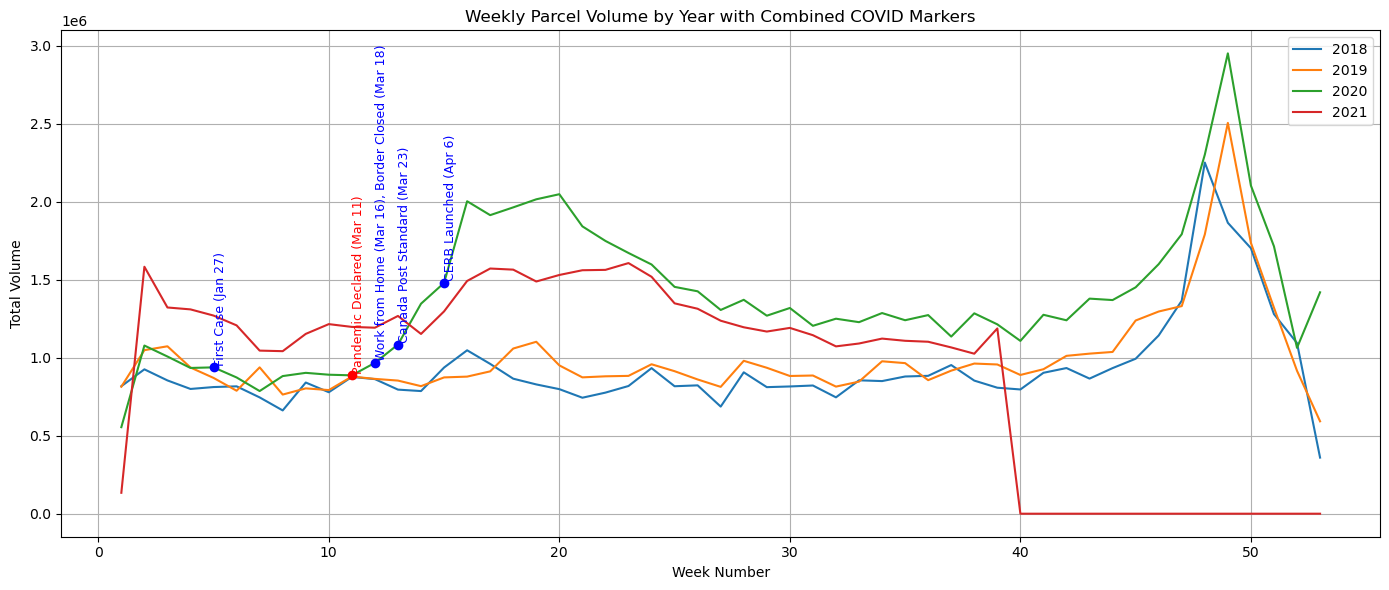

In [124]:
# 1. Aggregate weekly volume per year
volume_2018 = total_volume_2018.groupby('week')['volume'].sum().rename('2018')
volume_2019 = total_volume_2019.groupby('week')['volume'].sum().rename('2019')
volume_2020 = total_volume_2020.groupby('week')['volume'].sum().rename('2020')
volume_2021 = total_volume_2021.groupby('week')['volume'].sum().rename('2021')

# 2. Merge into one DataFrame
df_weekly = pd.concat([volume_2018, volume_2019, volume_2020, volume_2021], axis=1).fillna(0).reset_index()

# 3. Define combined COVID event labels by WEEK
covid_events_combined = {
    5: 'First Case (Jan 27)',
    11: 'Pandemic Declared (Mar 11)',
    12: 'Work from Home (Mar 16), Border Closed (Mar 18)',
    13: 'Canada Post Standard (Mar 23)',
    15: 'CERB Launched (Apr 6)'
}

# 4. Plot line chart
plt.figure(figsize=(14, 6))
plt.plot(df_weekly['week'], df_weekly['2018'], label='2018')
plt.plot(df_weekly['week'], df_weekly['2019'], label='2019')
plt.plot(df_weekly['week'], df_weekly['2020'], label='2020')
plt.plot(df_weekly['week'], df_weekly['2021'], label='2021')

# 5. Annotate COVID events
for week, label in covid_events_combined.items():
    y = df_weekly[df_weekly['week'] == week]['2020'].values[0]
    color = 'red' if 'Pandemic' in label else 'blue'
    plt.scatter(week, y, color=color, zorder=5)
    plt.text(week, y + 10000, label, rotation=90, verticalalignment='bottom', fontsize=9, color=color)

# 6. Final layout
plt.title('Weekly Parcel Volume by Year with Combined COVID Markers')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

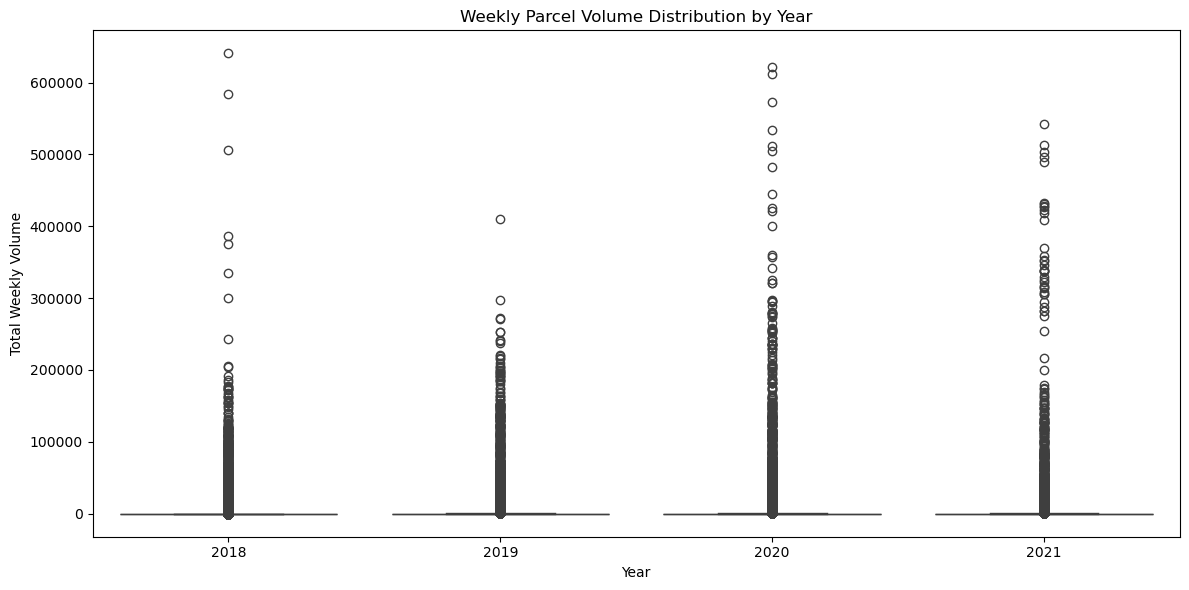

In [125]:
# 1. Add 'year' column to each dataset
total_volume_2018['year'] = 2018
total_volume_2019['year'] = 2019
total_volume_2020['year'] = 2020
total_volume_2021['year'] = 2021

# 2. Combine all years into a single DataFrame (keep original column name 'volume')
combined_box = pd.concat([
    total_volume_2018[['week', 'volume', 'year']],
    total_volume_2019[['week', 'volume', 'year']],
    total_volume_2020[['week', 'volume', 'year']],
    total_volume_2021[['week', 'volume', 'year']]
], ignore_index=True)

# 3. Plot boxplot using 'volume'
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_box, x='year', y='volume')

# 4. Add title and labels
plt.title('Weekly Parcel Volume Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Weekly Volume')
plt.tight_layout()
plt.show()

### Peak comparison

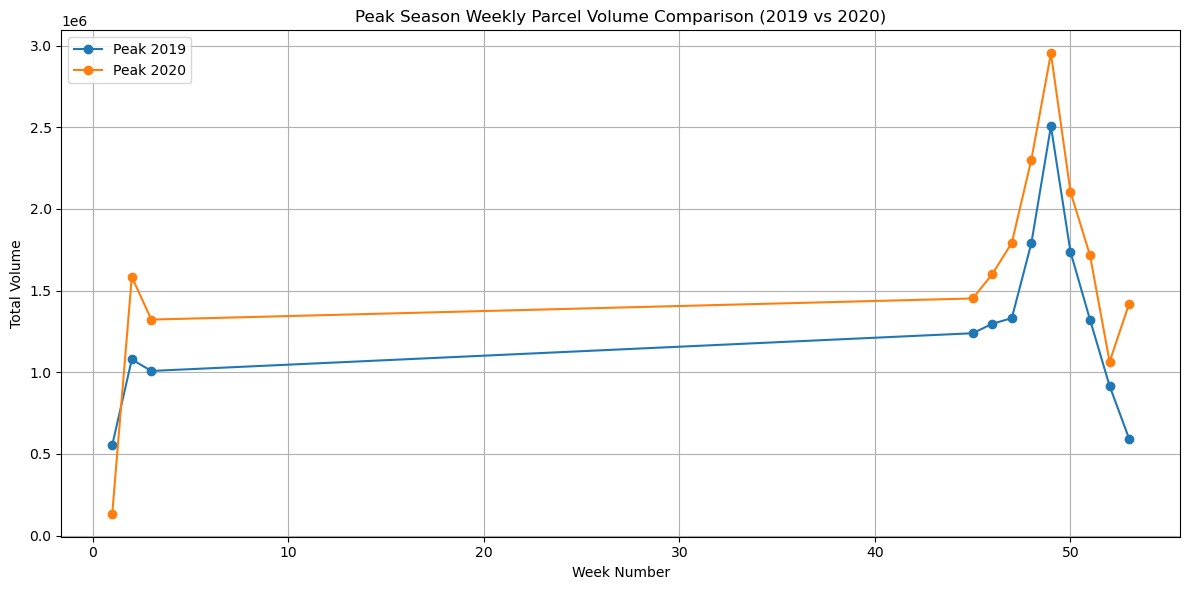

In [126]:
# 1. Aggregate volume by week
peak_2019_weekly = peak_2019.groupby('week')['volume'].sum().rename('2019')
peak_2020_weekly = peak_2020.groupby('week')['volume'].sum().rename('2020')

# 2. Combine into one DataFrame
df_peak = pd.concat([peak_2019_weekly, peak_2020_weekly], axis=1).fillna(0).reset_index()

# 3. Plot
plt.figure(figsize=(12, 6))
plt.plot(df_peak['week'], df_peak['2019'], label='Peak 2019', marker='o')
plt.plot(df_peak['week'], df_peak['2020'], label='Peak 2020', marker='o')

# 4. Styling
plt.title('Peak Season Weekly Parcel Volume Comparison (2019 vs 2020)')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

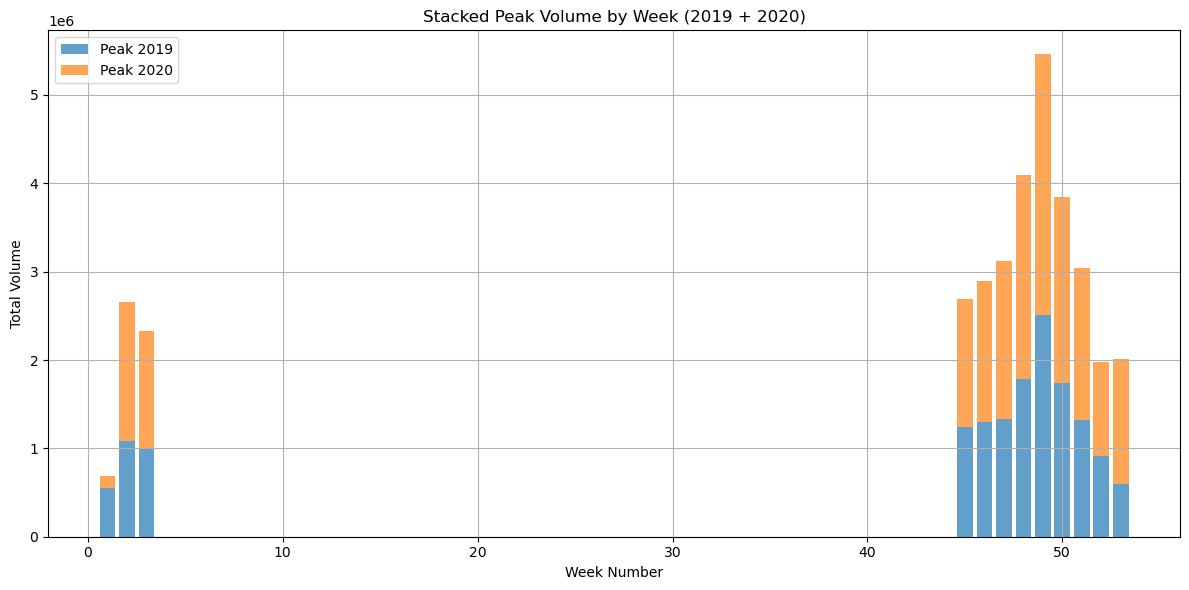

In [127]:
# 1. Plot stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_peak['week'], df_peak['2019'], label='Peak 2019', alpha=0.7)
plt.bar(df_peak['week'], df_peak['2020'], bottom=df_peak['2019'], label='Peak 2020', alpha=0.7)

# 2. Styling
plt.title('Stacked Peak Volume by Week (2019 + 2020)')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


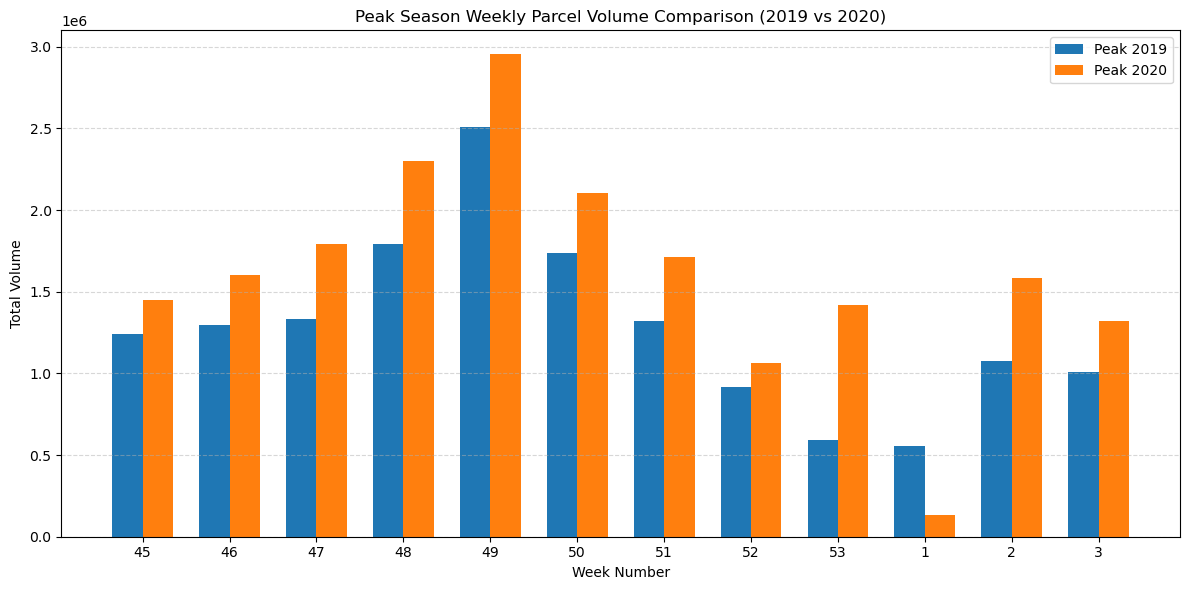

In [128]:
# Step 1: Sort weeks logically: 45–53 (end of 2019), then 1–3 (start of 2020)
ordered_weeks = list(range(45, 54)) + [1, 2, 3]

# Step 2: Filter and reindex df_peak
df_peak_sorted = df_peak[df_peak['week'].isin(ordered_weeks)]
df_peak_sorted['week'] = pd.Categorical(df_peak_sorted['week'], categories=ordered_weeks, ordered=True)
df_peak_sorted = df_peak_sorted.sort_values('week')

# Step 3: Bar chart
x = np.arange(len(df_peak_sorted['week']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_peak_sorted['2019'], width, label='Peak 2019')
plt.bar(x + width/2, df_peak_sorted['2020'], width, label='Peak 2020')

plt.xticks(x, df_peak_sorted['week'])
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.title('Peak Season Weekly Parcel Volume Comparison (2019 vs 2020)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### COVID comparison

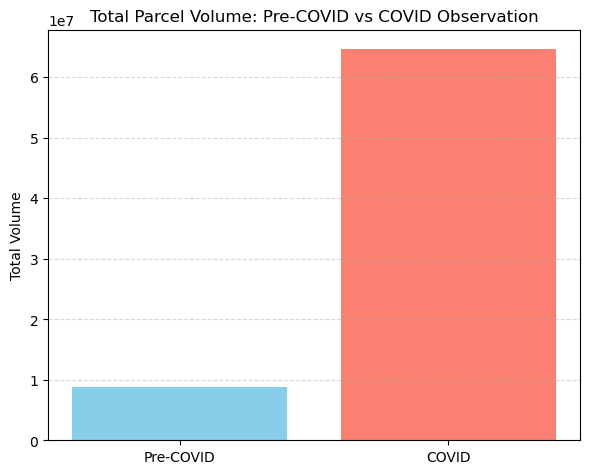

In [129]:
# Calculate total volume for each period
total_pre = pre_covid_observation['volume'].sum()
total_covid = covid_observation['volume'].sum()

# Create bar chart
plt.figure(figsize=(6, 5))
plt.bar(['Pre-COVID', 'COVID'], [total_pre, total_covid], color=['skyblue', 'salmon'])
plt.title('Total Parcel Volume: Pre-COVID vs COVID Observation')
plt.ylabel('Total Volume')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

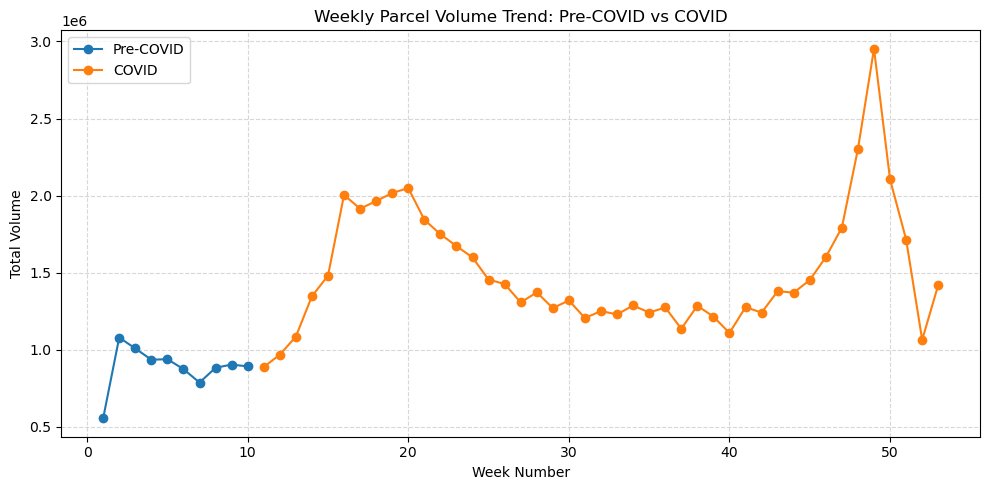

In [130]:
# Aggregate weekly volume for each period
weekly_pre = pre_covid_observation.groupby('week')['volume'].sum().reset_index()
weekly_covid = covid_observation.groupby('week')['volume'].sum().reset_index()

# Create line chart
plt.figure(figsize=(10, 5))
plt.plot(weekly_pre['week'], weekly_pre['volume'], label='Pre-COVID', marker='o')
plt.plot(weekly_covid['week'], weekly_covid['volume'], label='COVID', marker='o')

plt.title('Weekly Parcel Volume Trend: Pre-COVID vs COVID')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Pandemic comparison with Pre and post period

In [131]:
# Step 1: Create 'week_year' column for pre_pandemic_period
pre_pandemic_period_week_year = pre_pandemic_period.copy()
pre_pandemic_period_week_year['week_year'] = pre_pandemic_period_week_year['week'].apply(lambda w: f"W{int(w):02d}") + " - " + pre_pandemic_period_week_year['year'].astype(str)

# Step 2: Create 'week_year' column for covid_observation
covid_observation_week_year = covid_observation.copy()
covid_observation_week_year['week_year'] = covid_observation_week_year['week'].apply(
    lambda w: f"W{int(w):02d} - 2020" if pd.notna(w) else np.nan
)

# Step 3: Create 'week_year' column for total_volume_2021
total_volume_2021_week_year = total_volume_2021.copy()
total_volume_2021_week_year['week_year'] = total_volume_2021_week_year['week'].apply(
    lambda w: f"W{int(w):02d} - 2021" if pd.notna(w) else np.nan
)

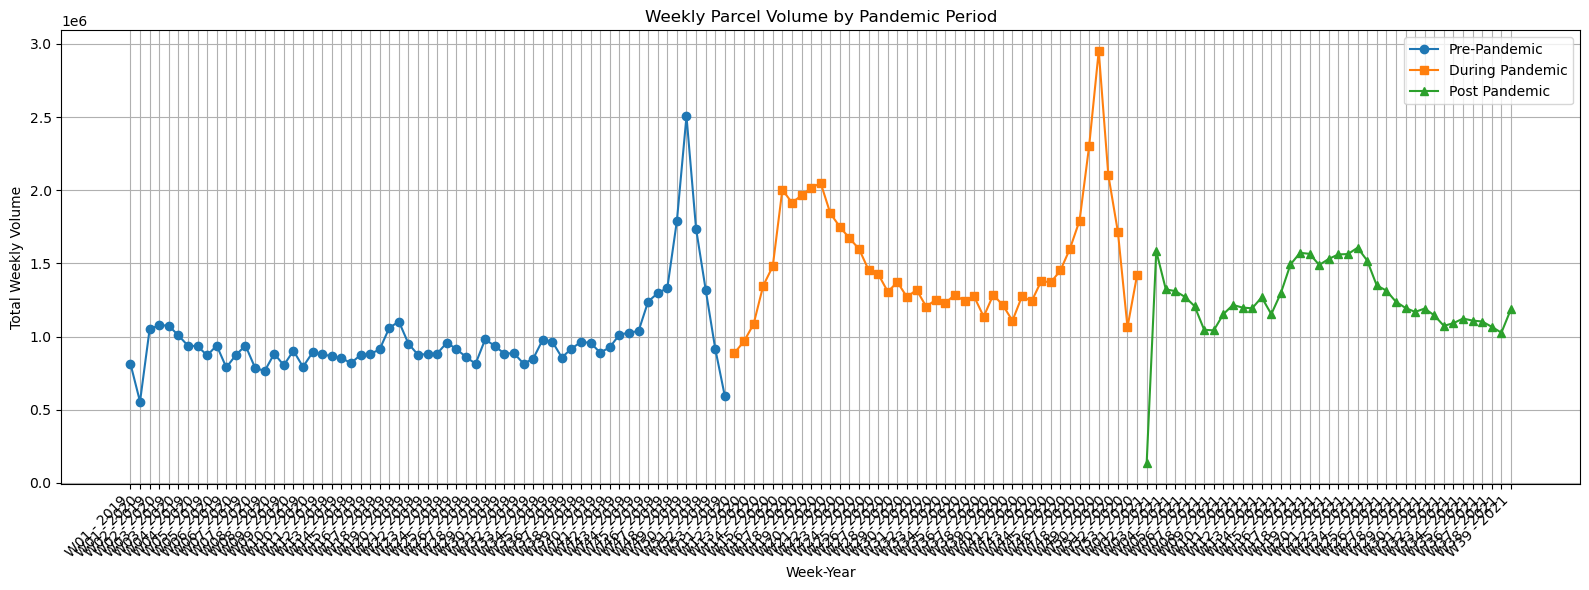

In [132]:
# Step 1: Aggregate total volume by week_year
pre_pandemic_plot = pre_pandemic_period_week_year.groupby('week_year')['volume'].sum().reset_index()
covid_plot = covid_observation_week_year.groupby('week_year')['volume'].sum().reset_index()
post_pandemic_plot = total_volume_2021_week_year.groupby('week_year')['volume'].sum().reset_index()

# Step 2: Sort each dataframe by week_year to ensure correct line order
pre_pandemic_plot = pre_pandemic_plot.sort_values('week_year')
covid_plot = covid_plot.sort_values('week_year')
post_pandemic_plot = post_pandemic_plot.sort_values('week_year')

# Step 3: Plot line chart
plt.figure(figsize=(16, 6))
plt.plot(pre_pandemic_plot['week_year'], pre_pandemic_plot['volume'], label='Pre-Pandemic', marker='o')
plt.plot(covid_plot['week_year'], covid_plot['volume'], label='During Pandemic', marker='s')
plt.plot(post_pandemic_plot['week_year'], post_pandemic_plot['volume'], label='Post Pandemic', marker='^')

# Step 4: Format the chart
plt.xlabel('Week-Year')
plt.ylabel('Total Weekly Volume')
plt.title('Weekly Parcel Volume by Pandemic Period')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Groups analysis

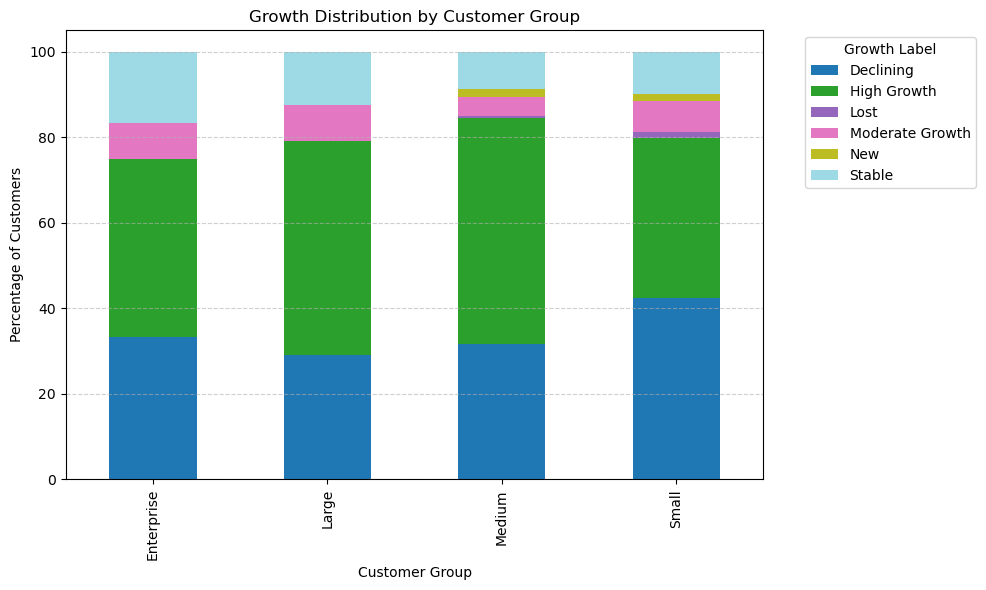

In [144]:
# Step 1: Combine all groups into one DataFrame
Small_Volume_Comparison['segment'] = 'Small'
Medium_Volume_Comparison['segment'] = 'Medium'
Large_Volume_Comparison['segment'] = 'Large'
Enterprise_Volume_Comparison['segment'] = 'Enterprise'

all_groups = pd.concat([
    Small_Volume_Comparison,
    Medium_Volume_Comparison,
    Large_Volume_Comparison,
    Enterprise_Volume_Comparison
])

# Step 2: Group and calculate % by segment and growth_label
group_dist = all_groups.groupby(['segment', 'growth_label'])['customer_ID'].count().reset_index()
group_total = all_groups.groupby('segment')['customer_ID'].count().rename('total').reset_index()

# Step 3: Merge and calculate percentage
dist = group_dist.merge(group_total, on='segment')
dist['percent'] = (dist['customer_ID'] / dist['total']) * 100

# Step 4: Pivot for plotting
pivot = dist.pivot(index='segment', columns='growth_label', values='percent').fillna(0)

# Step 5: Plot stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Growth Distribution by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Percentage of Customers')
plt.legend(title='Growth Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


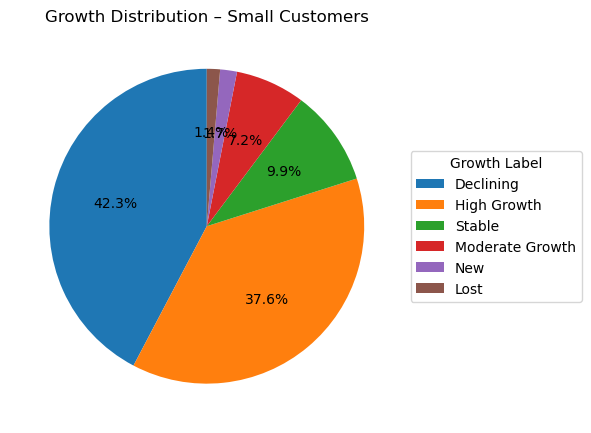

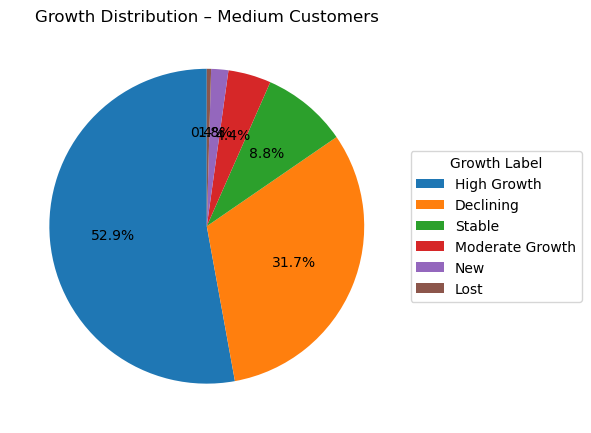

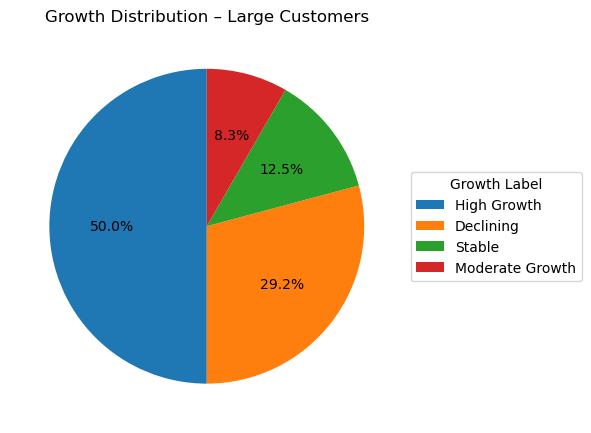

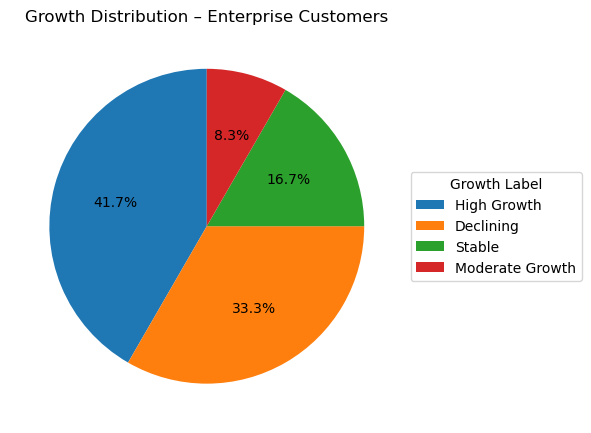

In [148]:
# Function to draw pie chart with legend
def plot_growth_pie(df, group_name):
    counts = df['growth_label'].value_counts(normalize=True) * 100
    labels = counts.index
    values = counts.values

    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(
        values,
        labels=None,
        autopct='%1.1f%%',
        startangle=90
    )

    # Add legend on the right
    plt.legend(wedges, labels, title="Growth Label", loc="center left", bbox_to_anchor=(1, 0.5))

    plt.title(f'Growth Distribution – {group_name} Customers')
    plt.tight_layout()
    plt.show()

# Plot for each group
plot_growth_pie(Small_Volume_Comparison, "Small")
plot_growth_pie(Medium_Volume_Comparison, "Medium")
plot_growth_pie(Large_Volume_Comparison, "Large")
plot_growth_pie(Enterprise_Volume_Comparison, "Enterprise")

### Companies analysis

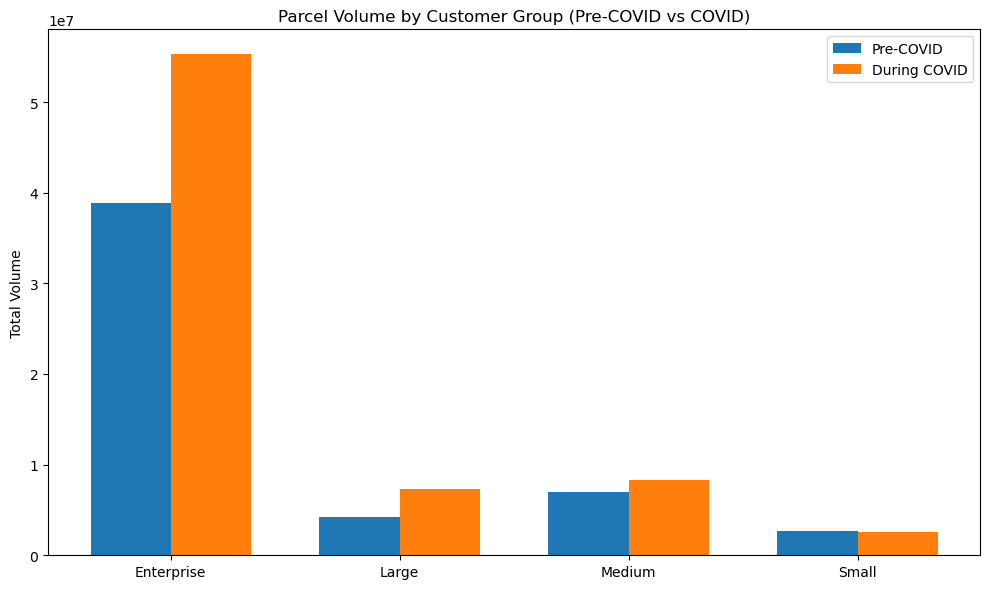

In [133]:
# Group total volume by customer group during Pre-COVID and COVID
pre_volume_by_group = customer_group_2019.groupby('group_2019')['volume'].sum().reset_index()
covid_volume_by_group = customer_group_2020.groupby('group_2020')['volume'].sum().reset_index()

# Rename for clarity
pre_volume_by_group.columns = ['group', 'volume_pre']
covid_volume_by_group.columns = ['group', 'volume_covid']

# Merge both into one table
volume_compare = pre_volume_by_group.merge(covid_volume_by_group, on='group')

# Plot grouped bar chart
x = np.arange(len(volume_compare['group']))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, volume_compare['volume_pre'], width, label='Pre-COVID')
plt.bar(x + width/2, volume_compare['volume_covid'], width, label='During COVID')

plt.xticks(x, volume_compare['group'])
plt.ylabel('Total Volume')
plt.title('Parcel Volume by Customer Group (Pre-COVID vs COVID)')
plt.legend()
plt.tight_layout()
plt.show()


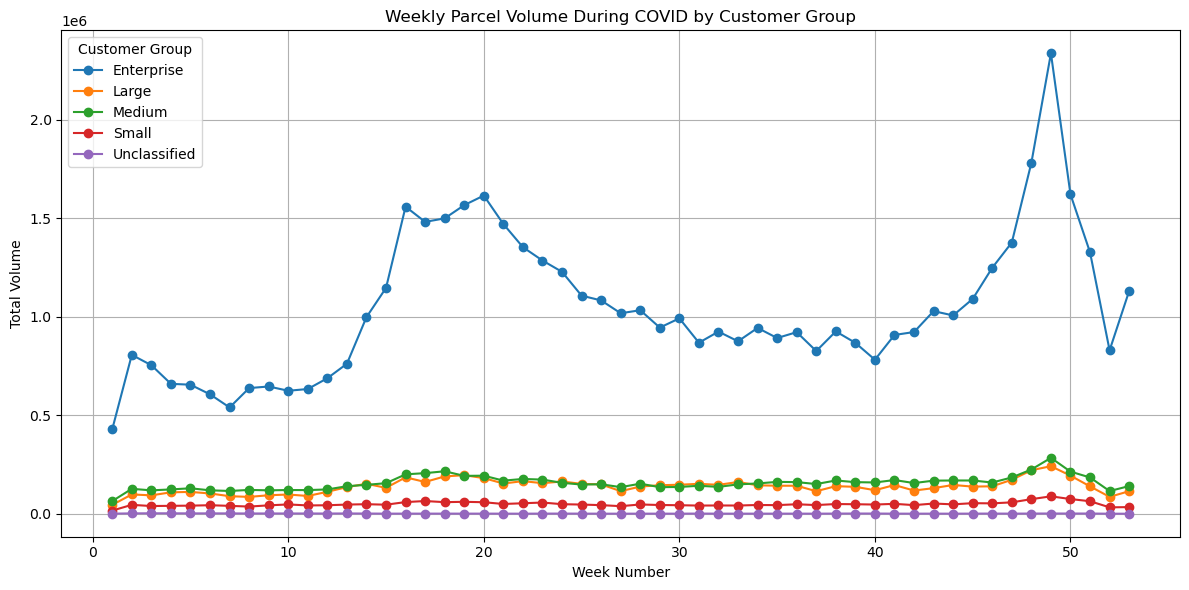

In [134]:
# Step 1: Aggregate volume per week per group
group_weekly_covid = customer_group_2020.groupby(['group_2020', 'week'])['volume'].sum().reset_index()

# Step 2: Pivot the data to have groups as columns
pivot_data = group_weekly_covid.pivot(index='week', columns='group_2020', values='volume').fillna(0)

# Step 3: Plot line chart for each group
plt.figure(figsize=(12, 6))
for group in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[group], label=group, marker='o')

plt.title('Weekly Parcel Volume During COVID by Customer Group')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend(title='Customer Group')
plt.grid(True)
plt.tight_layout()
plt.show()


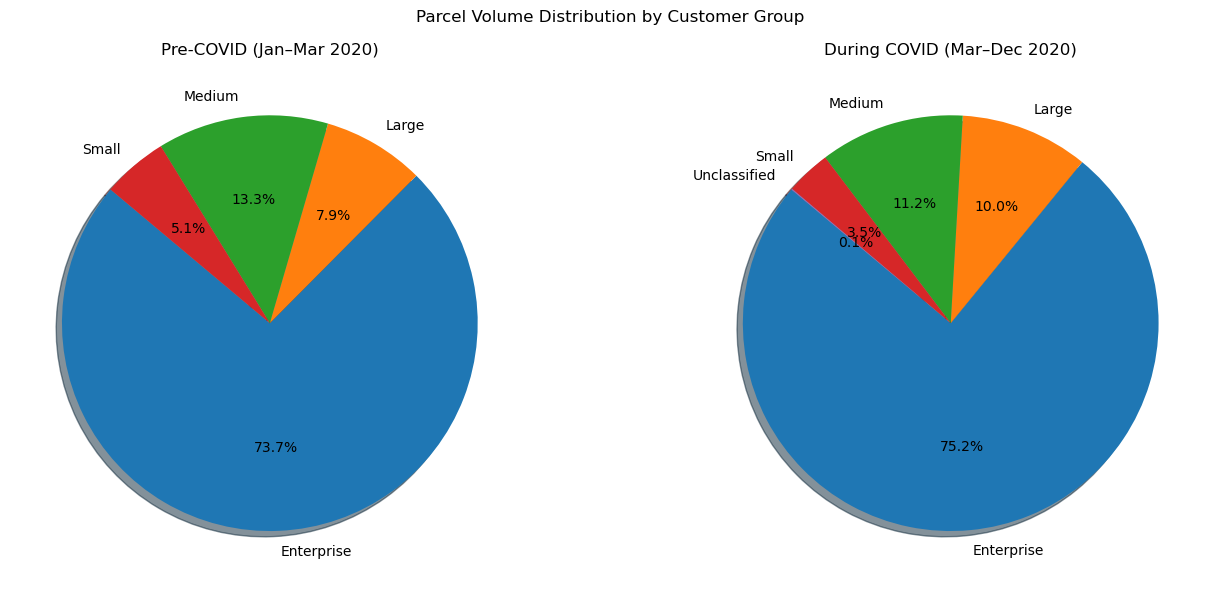

In [135]:
# Step 1: Aggregate volume by group for each period
pre_volume_group = customer_group_2019.groupby('group_2019')['volume'].sum().reset_index()
covid_volume_group = customer_group_2020.groupby('group_2020')['volume'].sum().reset_index()

# Step 2: Prepare data and labels
labels_pre = pre_volume_group['group_2019']
sizes_pre = pre_volume_group['volume']

labels_covid = covid_volume_group['group_2020']
sizes_covid = covid_volume_group['volume']

# Step 3: Plot two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pre-COVID pie chart
axes[0].pie(sizes_pre, labels=labels_pre, autopct='%1.1f%%', startangle=140, shadow=True)
axes[0].set_title('Pre-COVID (Jan–Mar 2020)')

# During-COVID pie chart
axes[1].pie(sizes_covid, labels=labels_covid, autopct='%1.1f%%', startangle=140, shadow=True)
axes[1].set_title('During COVID (Mar–Dec 2020)')

# General formatting
plt.suptitle('Parcel Volume Distribution by Customer Group')
plt.tight_layout()
plt.show()


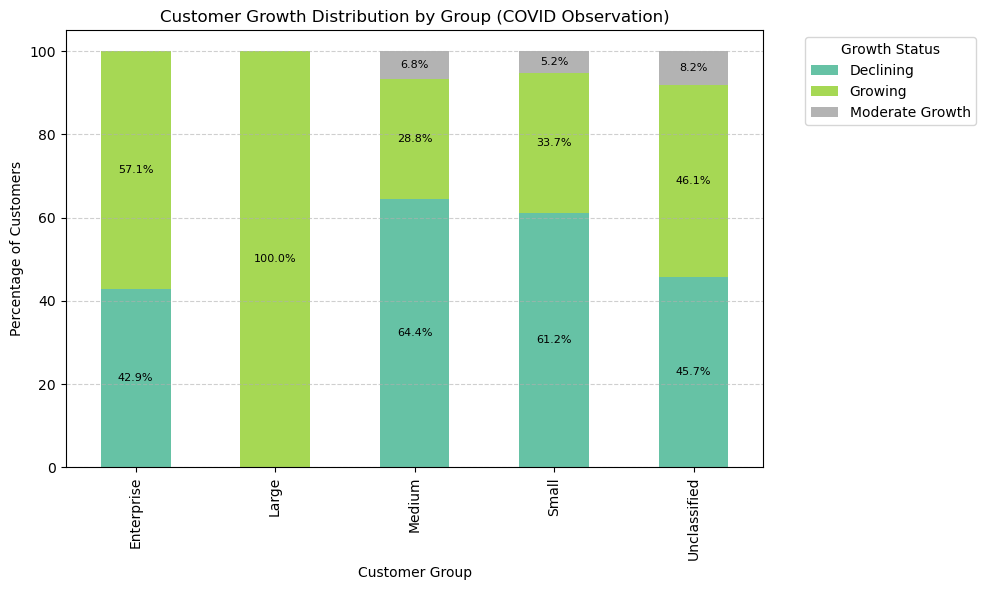

In [136]:
# Step 1: Filter relevant growth labels
filtered_df = company_ISGR_2019_2020_full[
    company_ISGR_2019_2020_full['growth_label'].isin(['High Growth', 'Moderate Growth', 'Declining'])
].copy()

# Step 2: Rename 'High Growth' to 'Growing'
filtered_df['growth_label'] = filtered_df['growth_label'].replace({'High Growth': 'Growing'})

# Step 3: Count per group
group_growth_count = filtered_df.groupby(['group_2019', 'growth_label'])['customer_ID'].count().reset_index()

# Step 4: Pivot to wide format
group_growth_pivot = group_growth_count.pivot(index='group_2019', columns='growth_label', values='customer_ID').fillna(0)

# Step 5: Convert to percent
group_growth_percent = group_growth_pivot.div(group_growth_pivot.sum(axis=1), axis=0) * 100

# Step 6: Plot
ax = group_growth_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Customer Growth Distribution by Group (COVID Observation)')
plt.xlabel('Customer Group')
plt.ylabel('Percentage of Customers')
plt.legend(title='Growth Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Step 7: Add % labels on each segment
for i, group in enumerate(group_growth_percent.index):
    y_offset = 0
    for label in group_growth_percent.columns:
        value = group_growth_percent.loc[group, label]
        if value > 0:
            ax.text(i, y_offset + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += value

plt.tight_layout()
plt.show()

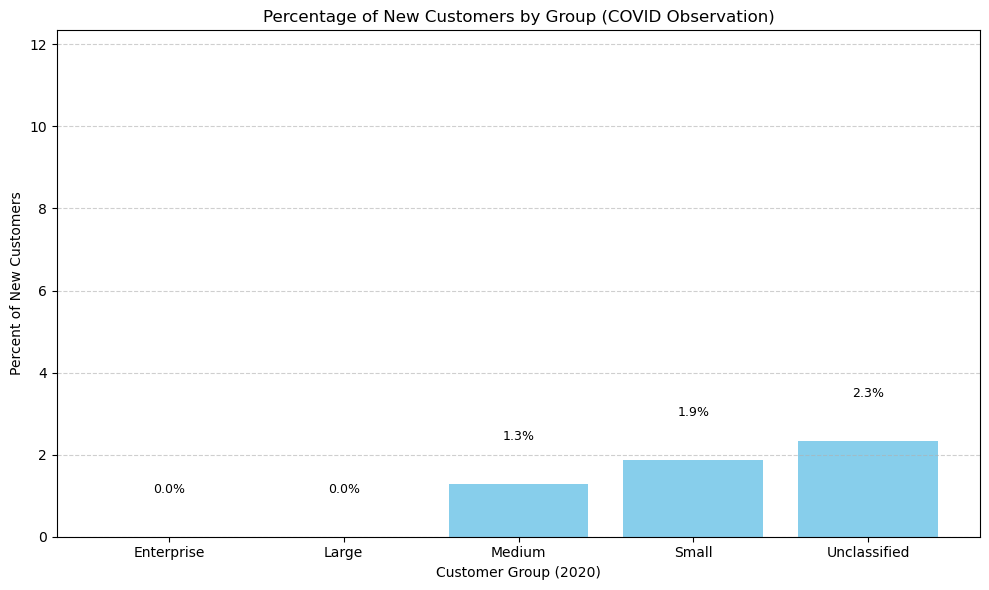

In [137]:
# Step 1: Count number of new customers per group_2020
new_counts = company_ISGR_2019_2020_full[
    company_ISGR_2019_2020_full['growth_label'] == 'New'
].groupby('group_2020')['customer_ID'].count().reset_index(name='new_customers')

# Step 2: Count total customers per group_2020
total_counts = company_ISGR_2019_2020_full.groupby('group_2020')['customer_ID'].count().reset_index(name='total_customers')

# Step 3: Merge and calculate percentage
merged = total_counts.merge(new_counts, on='group_2020', how='left').fillna(0)
merged['percent_new'] = (merged['new_customers'] / merged['total_customers']) * 100

# Step 4: Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(merged['group_2020'], merged['percent_new'], color='skyblue')

# Add percentage labels on top of bars
for i, value in enumerate(merged['percent_new']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.title('Percentage of New Customers by Group (COVID Observation)')
plt.xlabel('Customer Group (2020)')
plt.ylabel('Percent of New Customers')
plt.ylim(0, merged['percent_new'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

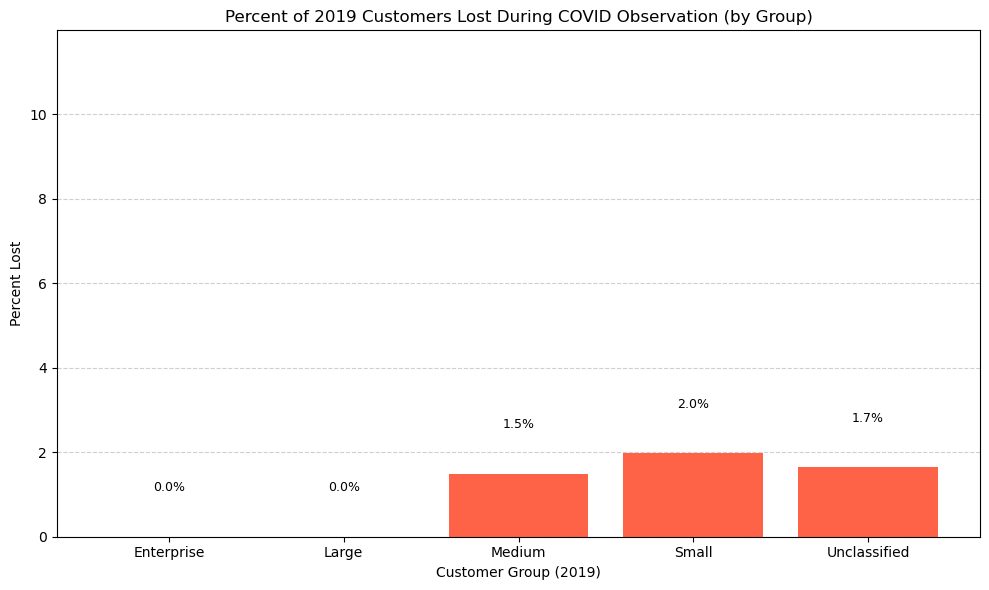

In [138]:
# Step 1: Filter only customers who had volume in 2019
df_2019_customers = company_ISGR_2019_2020_full[
    company_ISGR_2019_2020_full['volume_2019'] > 0
].copy()

# Step 2: Identify 'lost' customers (no volume in 2020)
df_2019_customers['is_lost'] = df_2019_customers['volume_2020'] == 0

# Step 3: Group by 2019 customer size and calculate lost ratio
summary = df_2019_customers.groupby('group_2019').agg(
    total_2019=('customer_ID', 'count'),        # total customers in 2019 by group
    lost_customers=('is_lost', 'sum')           # count of customers with 0 volume in 2020
).reset_index()

# Step 4: Calculate percentage lost
summary['percent_lost'] = (summary['lost_customers'] / summary['total_2019']) * 100

# Step 5: Plot the result
plt.figure(figsize=(10, 6))
plt.bar(summary['group_2019'], summary['percent_lost'], color='tomato')

# Step 6: Add labels on top of each bar
for i, value in enumerate(summary['percent_lost']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

# Step 7: Format chart
plt.title('Percent of 2019 Customers Lost During COVID Observation (by Group)')
plt.xlabel('Customer Group (2019)')
plt.ylabel('Percent Lost')
plt.ylim(0, summary['percent_lost'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Calculate revenue

In [139]:
# Step 1: Define base cost and discount mapping
base_cost = 22.00
discounts = {
    'Enterprise': 0.22,
    'Large': 0.17,
    'Medium': 0.10,
    'Small': 0.04,
    'Unclassified': 0.00
}

# Step 2: Copy dataset
df = company_ISGR_2019_2020_full.copy()

# Step 3: Apply discounts
df['discount_2019'] = df['group_2019'].map(discounts)
df['discount_2020'] = df['group_2020'].map(discounts)

# Step 4: Calculate revenue
df['revenue_2019'] = df['volume_2019'] * base_cost * (1 - df['discount_2019'])
df['revenue_2020'] = df['volume_2020'] * base_cost * (1 - df['discount_2020'])

# Step 5: Group by 2019 group
impact = df.groupby('group_2019').agg(
    total_volume_2019=('volume_2019', 'sum'),
    total_volume_2020=('volume_2020', 'sum'),
    total_revenue_2019=('revenue_2019', 'sum'),
    total_revenue_2020=('revenue_2020', 'sum')
).reset_index()

# Step 6: Calculate percentage change
impact['volume_change_%'] = (
    (impact['total_volume_2020'] - impact['total_volume_2019']) / impact['total_volume_2019']
) * 100

impact['revenue_change_%'] = (
    (impact['total_revenue_2020'] - impact['total_revenue_2019']) / impact['total_revenue_2019']
) * 100

# Step 7: Round for readability
impact = impact.round(2)

# Step 8: Display result
print("COVID Impact by Customer Group:")
display(impact)

COVID Impact by Customer Group:


,group_2019,total_volume_2019,total_volume_2020,total_revenue_2019,total_revenue_2020,volume_change_%,revenue_change_%
0,Enterprise,8278320.0,9241802.0,1.420560e+08,1.585893e+08,11.64,11.64
1,Large,617418.0,703273.0,1.127405e+07,1.284176e+07,13.91,13.91
2,Medium,2927003.0,2946881.0,5.795466e+07,5.840451e+07,0.68,0.78
3,Small,996246.0,1056283.0,2.104072e+07,2.209705e+07,6.03,5.02
4,Unclassified,303829.0,670778.0,6.684238e+06,1.410882e+07,120.77,111.08


In [140]:
# Base price per parcel
price_per_parcel = 22.0

# Calculate revenue
impact['total_revenue_2019'] = impact['total_volume_2019'] * price_per_parcel
impact['total_revenue_2020'] = impact['total_volume_2020'] * price_per_parcel

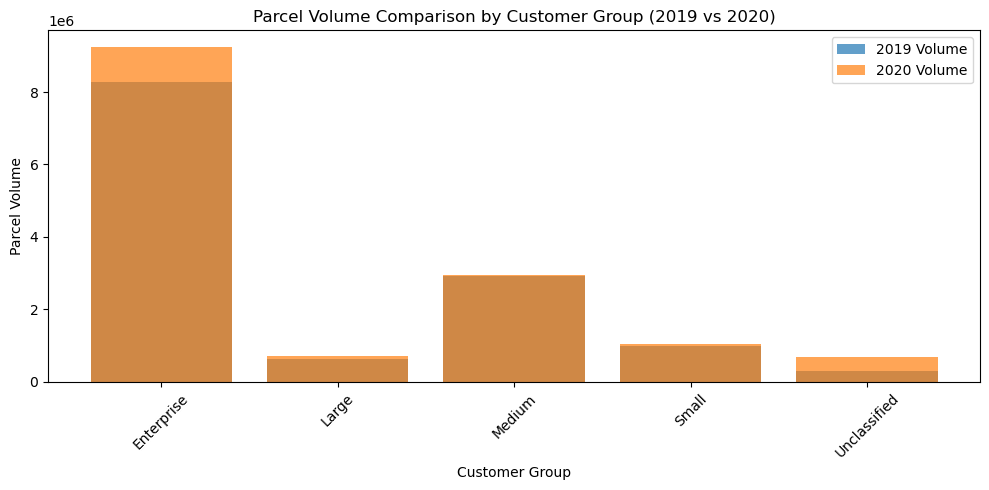

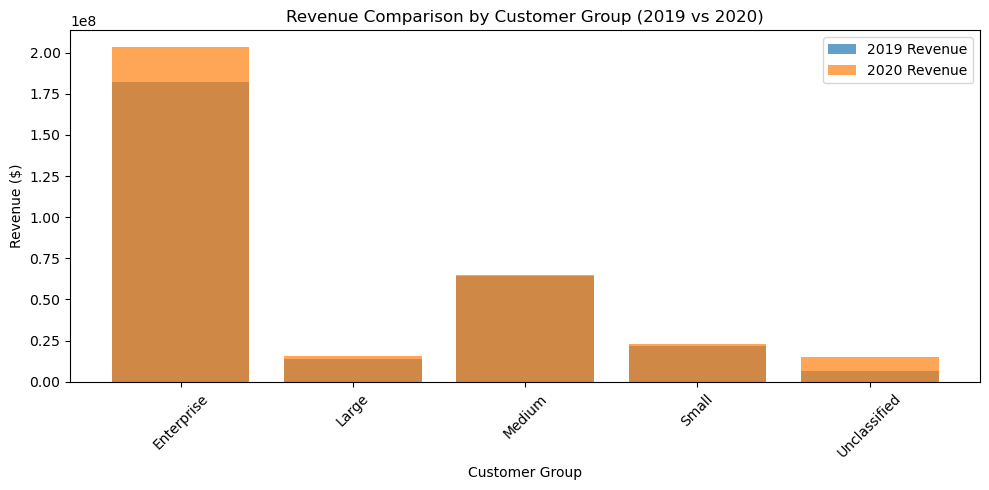

In [141]:
# Plot 1: Volume Comparison (2019 vs 2020)
plt.figure(figsize=(10, 5))
plt.bar(impact['group_2019'], impact['total_volume_2019'], label='2019 Volume', alpha=0.7)
plt.bar(impact['group_2019'], impact['total_volume_2020'], label='2020 Volume', alpha=0.7, bottom=0)
plt.xlabel('Customer Group')
plt.ylabel('Parcel Volume')
plt.title('Parcel Volume Comparison by Customer Group (2019 vs 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Revenue Comparison (2019 vs 2020)
plt.figure(figsize=(10, 5))
plt.bar(impact['group_2019'], impact['total_revenue_2019'], label='2019 Revenue', alpha=0.7)
plt.bar(impact['group_2019'], impact['total_revenue_2020'], label='2020 Revenue', alpha=0.7, bottom=0)
plt.xlabel('Customer Group')
plt.ylabel('Revenue ($)')
plt.title('Revenue Comparison by Customer Group (2019 vs 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()